In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from PIL import Image
import pillow_heif  # Library for HEIC to PNG conversion

In [38]:
# Function to load and show images
def load_and_show_data(folder, num_images=5):
    images = []
    labels = []
    filenames = []
    
    # Load images from folder
    for filename in os.listdir(folder):
        if filename.lower().endswith('.png'):
            img = load_img(os.path.join(folder, filename), color_mode='grayscale', target_size=(100, 100))
            images.append(img_to_array(img).flatten())
            label = filename.split('_')[0]  # Extract label from filename
            labels.append(label)
            filenames.append(filename)
            if len(images) >= num_images:  # Limit number of images loaded for display
                break
    
    # Convert to numpy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    # Show the images with their labels
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(100, 100), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    
    plt.show()

    return np.array(images), np.array(labels), filenames


Training Data:


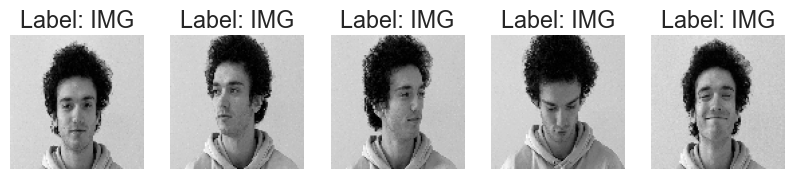

Testing Data:


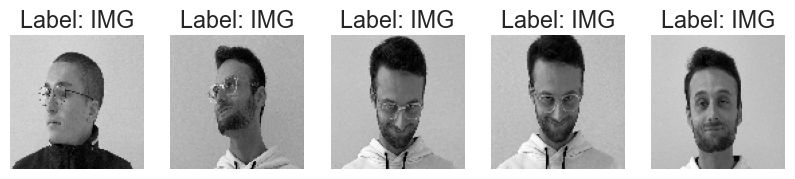

In [102]:
# Paths to your train and test folders
train_path = './train/'
test_path = './test/'

# Load and show data from the train folder
print("Training Data:")
train_images, train_labels, train_filenames = load_and_show_data(train_path, num_images=5)

# Load and show data from the test folder
print("Testing Data:")
test_images, test_labels, test_filenames = load_and_show_data(test_path, num_images=5)

# At this point, `train_images` and `test_images` are ready for further processing,
# such as applying PCA, training a model, etc

In [103]:
# Function to load images and labels from a folder
def load_data(folder_path):
    images = []
    labels = []
    
    for filename in os.listdir(folder_path):
        if filename.lower().endswith('.png'):  # Ensure only PNG files are processed
            img = load_img(os.path.join(folder_path, filename), color_mode='grayscale', target_size=(100, 100))
            images.append(img_to_array(img).flatten())  # Flatten the image
            label = filename.split('_')[0]  # Assuming labels are part of the filename (e.g., 'person1_img1.png')
            labels.append(label)
    
    return np.array(images), np.array(labels)

In [104]:
# Example usage:
train_path = './train/'
test_path = './test/'

# Load train and test datasets
X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)


In [105]:
# Function to normalize the data
def normalize_data(X_train, X_test):
    scaler = StandardScaler()  # Create a StandardScaler instance
    X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform it
    X_test_scaled = scaler.transform(X_test)  # Only transform the test data
    
    return X_train_scaled, X_test_scaled

In [106]:
# Load the data
train_path = './train/'
test_path = './test/'

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

# Normalize the train and test data
X_train_normalized, X_test_normalized = normalize_data(X_train, X_test)

# Now `X_train_normalized` and `X_test_normalized` are normalized and ready for further processing


In [107]:
# Step 1: Define a function to compute the mean face
def compute_mean_face(images):
    # Convert images list into a numpy array if it's not already
    images_array = np.array(images)
    
    # Compute the mean of the images along the first axis (average pixel-wise)
    mean_face = np.mean(images_array, axis=0)
    
    return mean_face


In [134]:
# Assuming X_train contains the flattened images
mean_face = compute_mean_face(X_train_normalized)  # Use normalized images for better visualization


In [135]:
# Load and preprocess the images
def load_and_preprocess_data(folder_path):
    # Load the images and labels
    images, labels = load_data(folder_path)
    
    # Normalize the images using StandardScaler
    scaler = StandardScaler()
    images_normalized = scaler.fit_transform(images)  # Fit and transform
    
    return images_normalized, labels


In [136]:
# Subtract the mean face from each image
def subtract_mean_face(images, mean_face):
    images_centered = images - mean_face  # Subtract mean face from each image
    return images_centered


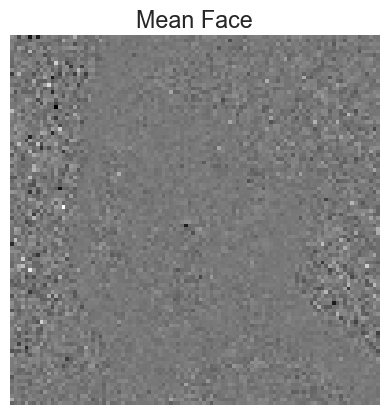

In [137]:
# Step 4: Putting everything together
# Load, preprocess data, and compute the mean face
train_path = './train/'
test_path = './test/'

# Load and preprocess training data
X_train_normalized, y_train = load_and_preprocess_data(train_path)

# Compute the mean face from the training data
mean_face = compute_mean_face(X_train_normalized)

# Subtract the mean face from each image
X_train_centered = subtract_mean_face(X_train_normalized, mean_face)

# Visualize the mean face
show_mean_face(mean_face)

# Load and preprocess test data
X_test_normalized, y_test = load_and_preprocess_data(test_path)

# Subtract the mean face from the test images
X_test_centered = subtract_mean_face(X_test_normalized, mean_face)


In [138]:
centered_and_normalized_faces = np.random.rand(100, 64, 64)  # par exemple, 100 images de 64x64

# Maintenant, vous pouvez accéder à sa forme
print(centered_and_normalized_faces.shape)

(100, 64, 64)


In [139]:
# Apply PCA to the training data (centered data)
def apply_pca(X_train_centered, n_components=42):
    pca = PCA(n_components=n_components)  # You can adjust the number of components
    X_train_pca = pca.fit_transform(X_train_centered)  # Fit PCA on the centered training data
    return pca, X_train_pca


In [140]:
# Visualize the Eigenfaces (principal components)
def plot_eigenfaces(pca, image_shape=(100, 100), num_eigenfaces=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_eigenfaces):
        plt.subplot(2, 5, i + 1)
        eigenface = pca.components_[i].reshape(image_shape)  # Reshape each principal component to image dimensions
        plt.imshow(eigenface, cmap='gray')
        plt.title(f"Eigenface {i + 1}")
        plt.axis('off')
    plt.show()


In [141]:
# Project images onto the PCA space (for both train and test sets)
def project_onto_pca(pca, X_centered):
    return pca.transform(X_centered)  # Transform centered data into PCA space


In [142]:
# Display the first 20 Eigenfaces in a 4x5 grid
def plot_first_20_eigenfaces(pca, image_shape=(100, 100)):
    plt.figure(figsize=(15, 10))  # Create a large figure to display 20 images
    for i in range(20):
        plt.subplot(4, 5, i + 1)  # Create a 4x5 grid of subplots
        eigenface = pca.components_[i].reshape(image_shape)  # Reshape each eigenface
        plt.imshow(eigenface, cmap='gray')
        plt.title(f"Eigenface {i + 1}")
        plt.axis('off')
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

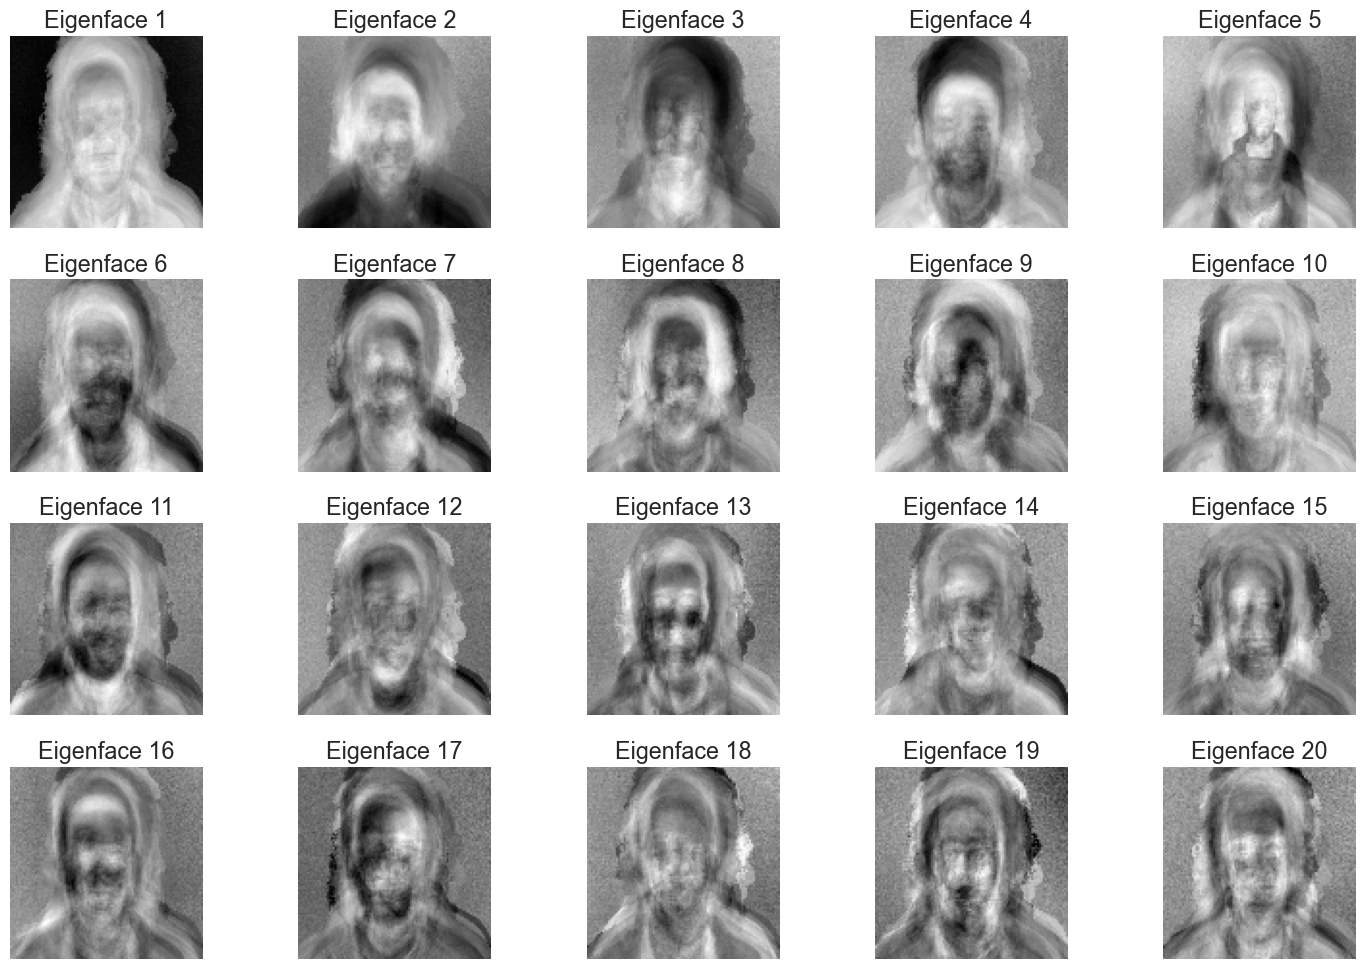

In [143]:
# Paths to your train folder
train_path = './train/'

# Load and preprocess training data
X_train_normalized, y_train = load_and_preprocess_data(train_path)

# Compute the mean face from the training data
mean_face = np.mean(X_train_normalized, axis=0)

# Subtract the mean face from the training data
X_train_centered = X_train_normalized - mean_face

# Apply PCA on the centered training data
pca, X_train_pca = apply_pca(X_train_centered, n_components=42)

# Visualize the first 20 Eigenfaces
plot_first_20_eigenfaces(pca, image_shape=(100, 100))

In [144]:
# Function to extract class labels from filenames (if filenames encode class info)
def extract_label_from_filename(filename):
    # Extract label from filename, assuming it's the first part of the filename, like 'personID_imgX.png'
    try:
        # For filenames like 'person1_image1.png', the label could be 'person1'
        return filename.split('_')[0]  # Modify this if your filenames follow a different pattern
    except IndexError:
        return None

In [145]:
# Function to extract class labels from filenames
def extract_label_from_filename(filename):
    # Extract the numeric part after 'IMG_' in the filename, e.g., 'IMG_2404.png' -> '2404'
    try:
        # Split the filename by '_' and take the second part (numeric part)
        return filename.split('_')[1].split('.')[0]  # This will return the numeric part as a string
    except IndexError:
        return None

In [146]:
# Function to load filenames and extract labels based on the filename
def load_filenames_and_labels(images_dir):
    # Get a list of image filenames (filtering by image file extensions)
    image_filenames = [f for f in os.listdir(images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Extract labels from the filenames
    labels = [extract_label_from_filename(f) for f in image_filenames]

    # Return the filenames and corresponding labels
    return image_filenames, labels


In [147]:
# Paths to the train and test directories
train_dir = r'C:\Users\HOME\dacpvsrn\train'
test_dir = r'C:\Users\HOME\dacpvsrn\test'

# Load image filenames and labels for train and test directories
train_filenames, train_labels = load_filenames_and_labels(train_dir)
test_filenames, test_labels = load_filenames_and_labels(test_dir)

# Output the results
print("Train Filenames:", train_filenames)
print("Train Labels:", train_labels)
print("Test Filenames:", test_filenames)
print("Test Labels:", test_labels)

Train Filenames: ['IMG_2404.png', 'IMG_2405.png', 'IMG_2406.png', 'IMG_2407.png', 'IMG_2408.png', 'IMG_2409.png', 'IMG_2410.png', 'IMG_2411.png', 'IMG_2412.png', 'IMG_2413.png', 'IMG_2415.png', 'IMG_2416.png', 'IMG_2417.png', 'IMG_2418.png', 'IMG_2419.png', 'IMG_2420.png', 'IMG_2421.png', 'IMG_2422.png', 'IMG_2423.png', 'IMG_2424.png', 'IMG_2426.png', 'IMG_2427.png', 'IMG_2430.png', 'IMG_2434.png', 'IMG_2435.png', 'IMG_2436.png', 'IMG_2437.png', 'IMG_2438.png', 'IMG_2440.png', 'IMG_2442.png', 'IMG_2443.png', 'IMG_2445.png', 'IMG_2446 2.png', 'IMG_2448.png', 'IMG_2449.png', 'IMG_2450.png', 'IMG_2451.png', 'IMG_2452.png', 'IMG_2453.png', 'IMG_2454.png', 'IMG_2455.png', 'IMG_2456.png', 'IMG_2457.png', 'IMG_2458.png', 'IMG_2459.png', 'IMG_2461.png', 'IMG_2462.png', 'IMG_2465.png', 'IMG_2466.png', 'IMG_2467.png', 'IMG_2468.png', 'IMG_2469.png', 'IMG_2470.png', 'IMG_2471.png', 'IMG_2473.png', 'IMG_2474.png', 'IMG_2476.png', 'IMG_2477.png', 'IMG_2478.png', 'IMG_2479.png', 'IMG_2480.png', 'IMG

In [148]:
# Function to process images
def process_image(image_path, target_size=(100, 100)):
    img = load_img(image_path, target_size=target_size, color_mode='grayscale')
    img_array = img_to_array(img).flatten()
    return img_array

In [149]:
# Function to load and preprocess images from a directory
def load_and_preprocess_images(image_folder):
    image_filenames = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    X_images = np.array([process_image(os.path.join(image_folder, f)) for f in image_filenames])
    return X_images, image_filenames


In [163]:
# Paths to the train and test directories
train_dir = r'C:\Users\HOME\dacpvsrn\train'
test_dir = r'C:\Users\HOME\dacpvsrn\test'

# Load and preprocess your training data
X_train, train_labels = load_and_preprocess_images(train_dir)

# Normalize and apply PCA to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
mean_face = np.mean(X_train_scaled, axis=0)
X_train_centered = X_train_scaled - mean_face
pca = PCA(n_components=42)  # Choose the number of components based on your requirement
X_train_pca = pca.fit_transform(X_train_centered)

# Load and preprocess your test data
X_test, y_test = load_and_preprocess_images(test_dir)

# Normalize the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Center the test data by subtracting the mean face
X_test_centered = X_test_scaled - mean_face

# Apply PCA on the test data
X_test_pca = pca.transform(X_test_centered)  # Use the PCA model fitted on the training data

# Now, calculate predicted labels for the test data
y_pred_pca = []

for i in range(X_test_pca.shape[0]):
    # Calculate distances between the test image and all training images
    distances = np.linalg.norm(X_train_pca - X_test_pca[i], axis=1)
    # Find the index of the closest training image
    recognized_face_index = np.argmin(distances)
    # Get the corresponding label of the closest training image
    recognized_face_label = train_labels[recognized_face_index]
    y_pred_pca.append(recognized_face_label)

print("Predicted Labels for Test Data:", y_pred_pca)

Predicted Labels for Test Data: ['IMG_2421.png', 'IMG_2421.png', 'IMG_2426.png', 'IMG_2426.png', 'IMG_2427.png', 'IMG_2427.png', 'IMG_2427.png', 'IMG_2427.png', 'IMG_2430.png', 'IMG_2430.png', 'IMG_2501.png', 'IMG_2501.png', 'IMG_2427.png', 'IMG_2427.png', 'IMG_2440.png', 'IMG_2440.png', 'IMG_2440.png', 'IMG_2440.png', 'IMG_2453.png', 'IMG_2453.png', 'IMG_2454.png', 'IMG_2454.png', 'IMG_2459.png', 'IMG_2459.png', 'IMG_2467.png', 'IMG_2467.png', 'IMG_2471.png', 'IMG_2471.png', 'IMG_2477.png', 'IMG_2477.png', 'IMG_2489.png', 'IMG_2489.png', 'IMG_2496.png', 'IMG_2496.png', 'IMG_2492.png', 'IMG_2492.png', 'IMG_2505.png', 'IMG_2505.png', 'IMG_2505.png', 'IMG_2505.png', 'IMG_2502.png', 'IMG_2502.png', 'IMG_2509.png', 'IMG_2509.png', 'IMG_2513.png', 'IMG_2513.png', 'IMG_2517.png', 'IMG_2517.png', 'IMG_2525.png', 'IMG_2525.png', 'IMG_2536.png', 'IMG_2536.png', 'IMG_2492.png', 'IMG_2492.png', 'IMG_2547.png', 'IMG_2547.png', 'IMG_2550.png', 'IMG_2550.png', 'IMG_2568.png', 'IMG_2568.png', 'IMG_25

In [164]:
train_dir = 'C:\\Users\\HOME\\dacpvsrn\\train'
if os.path.exists(train_dir):
    files_in_directory = os.listdir(train_dir)
    print(f"Fichiers dans le répertoire {train_dir}:")
    print(files_in_directory)
else:
    print(f"Le répertoire {train_dir} n'existe pas.")


Fichiers dans le répertoire C:\Users\HOME\dacpvsrn\train:
['.ipynb_checkpoints', 'IMG_2404.HEIC', 'IMG_2404.png', 'IMG_2405.HEIC', 'IMG_2405.png', 'IMG_2406.HEIC', 'IMG_2406.png', 'IMG_2407.HEIC', 'IMG_2407.png', 'IMG_2408.HEIC', 'IMG_2408.png', 'IMG_2409.HEIC', 'IMG_2409.png', 'IMG_2410.HEIC', 'IMG_2410.png', 'IMG_2411.HEIC', 'IMG_2411.png', 'IMG_2412.HEIC', 'IMG_2412.png', 'IMG_2413.HEIC', 'IMG_2413.png', 'IMG_2415.HEIC', 'IMG_2415.png', 'IMG_2416.HEIC', 'IMG_2416.png', 'IMG_2417.HEIC', 'IMG_2417.png', 'IMG_2418.HEIC', 'IMG_2418.png', 'IMG_2419.HEIC', 'IMG_2419.png', 'IMG_2420.HEIC', 'IMG_2420.png', 'IMG_2421.HEIC', 'IMG_2421.png', 'IMG_2422.HEIC', 'IMG_2422.png', 'IMG_2423.HEIC', 'IMG_2423.png', 'IMG_2424.HEIC', 'IMG_2424.png', 'IMG_2426.HEIC', 'IMG_2426.png', 'IMG_2427.HEIC', 'IMG_2427.png', 'IMG_2430.HEIC', 'IMG_2430.png', 'IMG_2434.HEIC', 'IMG_2434.png', 'IMG_2435.HEIC', 'IMG_2435.png', 'IMG_2436.HEIC', 'IMG_2436.png', 'IMG_2437.HEIC', 'IMG_2437.png', 'IMG_2438.HEIC', 'IMG_2438.p

In [177]:
def calculate_accuracy(y_true, y_pred):
    # Calcul de l'accuracy
    accuracy = accuracy_score(y_true, y_pred) * 100  # Convertir en pourcentage

    # Affichage des résultats
    print(f"Accuracy: {accuracy:.2f}%")
   
    
    return accuracy


In [178]:
# Appel de la fonction
accuracy = calculate_accuracy(y_test, y_pred_pca)

Accuracy: 71.43%


In [179]:
# Function to calculate recognition score
def calculate_recognition_score(true_labels, predicted_labels):
    correct_predictions = sum(np.array(true_labels) == np.array(predicted_labels))
    total_predictions = len(true_labels)
    recognition_score = (correct_predictions / total_predictions) * 100
    return recognition_score

# Calculate and print the recognition score
recognition_score = calculate_recognition_score(y_test, y_pred_pca)
print(f"Recognition Score: {recognition_score:.2f}%")


Recognition Score: 71.43%


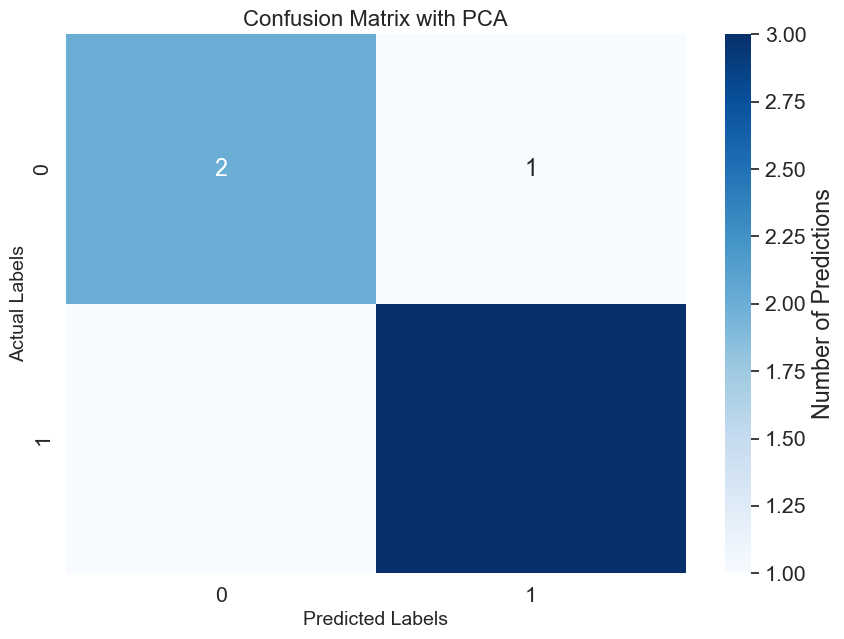

In [180]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_pca)

# Set up the matplotlib figure
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # Increase font size for readability

# Create the heatmap with integer labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.arange(cm.shape[1]),  # Use integers for the x-axis labels
            yticklabels=np.arange(cm.shape[0]),  # Use integers for the y-axis labels
            cbar_kws={'label': 'Number of Predictions'})

# Customize labels and title
plt.title('Confusion Matrix with PCA', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)

# Show the plot
plt.show()

In [132]:
#rnn